In [23]:
import pandas as pd # Import pandas
from prophet import Prophet
from scipy.stats import norm

In [24]:
df = pd.read_csv('50_Startups.csv')

In [25]:
df.head()

,Date,Profit
0,20180101,192261.83
1,20180102,191792.06
2,20180103,191050.39
3,20180104,182901.99
4,20180105,166187.94


In [26]:
df.dtypes

Date        int64
Profit    float64
dtype: object

In [27]:
profit_data = df['Profit']

# Calculate mean and standard deviation
mean_return = profit_data.mean()
std_dev = profit_data.std()

# Set confidence level
confidence_level = 0.99

# Find the Z-score
z_score = norm.ppf(confidence_level)

# Calculate Parametric VaR
parametric_var = mean_return - (z_score * std_dev)

print(f"Parametric VaR at {confidence_level * 100}% confidence: {parametric_var}")

Parametric VaR at 99.0% confidence: 18246.44226079993


In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [29]:
frame = df.copy()

In [30]:
frame.columns = ['ds', 'y']

In [31]:
frame.head()

,ds,y
0,2018-01-01,192261.83
1,2018-01-02,191792.06
2,2018-01-03,191050.39
3,2018-01-04,182901.99
4,2018-01-05,166187.94


In [32]:
m = Prophet(interval_width=0.95) 

In [33]:
training_run = m.fit(frame)

09:44:15 - cmdstanpy - INFO - Chain [1] start processing


09:44:15 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=20, freq='D')

In [35]:
forecast = m.predict(future)

In [36]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,186988.088003,174410.677503,194898.243675,186988.088003,186988.088003,-2053.693421,-2053.693421,-2053.693421,-2053.693421,-2053.693421,-2053.693421,0.0,0.0,0.0,184934.394582
1,2018-01-02,183061.473641,173404.210405,194931.065836,183061.473641,183061.473641,1257.416782,1257.416782,1257.416782,1257.416782,1257.416782,1257.416782,0.0,0.0,0.0,184318.890423
2,2018-01-03,179134.859278,170999.760072,191386.626282,179134.859278,179134.859278,2154.184885,2154.184885,2154.184885,2154.184885,2154.184885,2154.184885,0.0,0.0,0.0,181289.044163
3,2018-01-04,175208.244917,165240.807788,186317.954240,175208.244917,175208.244917,1491.088545,1491.088545,1491.088545,1491.088545,1491.088545,1491.088545,0.0,0.0,0.0,176699.333462
4,2018-01-05,171281.630556,160115.174464,180716.186702,171281.630556,171281.630556,-815.734459,-815.734459,-815.734459,-815.734459,-815.734459,-815.734459,0.0,0.0,0.0,170465.896097


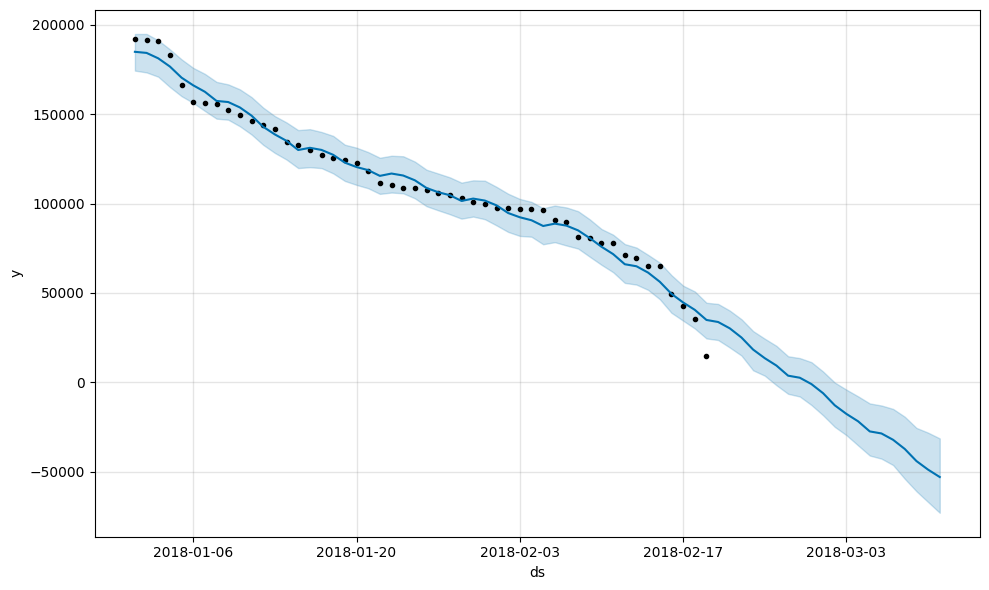

In [37]:
plot1 = m.plot(forecast)

In [38]:
plot1.savefig("Profit pic")

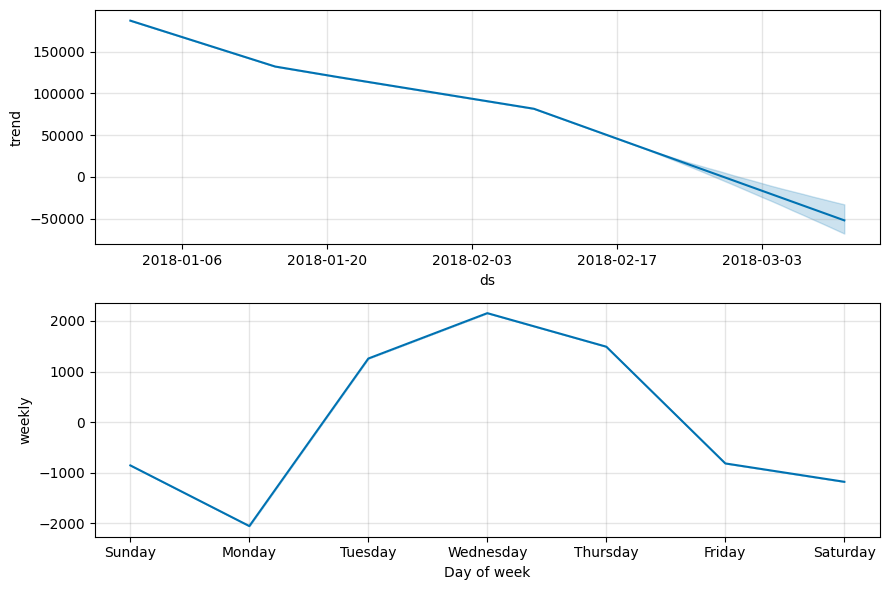

In [39]:
plot2 = m.plot_components(forecast)